In [ ]:
import pandas as pd
datos = pd.read_csv("uac_limpio.csv")

In [ ]:
datos.head()

,ESCUELA,SEDE,EDAD,PROMEDIO,EXCELENCIA,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE
0,ADMINISTRACIÓN,CUSCO,20,16.466,0,1,0,0,0,0,2,4
1,ADMINISTRACIÓN,QUILLABAMBA,27,19.103,1,0,0,0,1,0,2,5
2,ADMINISTRACIÓN,CUSCO,22,14.318,0,0,0,0,1,1,1,10
3,ADMINISTRACIÓN,QUILLABAMBA,27,14.088,0,1,2,1,1,1,2,7
4,ADMINISTRACIÓN,QUILLABAMBA,31,15.463,0,0,0,0,1,1,2,10


In [ ]:
datos.describe()

,EDAD,PROMEDIO,EXCELENCIA,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE
count,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000,8856.000000
mean,23.127823,15.233239,0.292118,0.556911,0.118790,0.097448,0.640018,0.333559,0.996725,6.574864
std,4.743533,2.462456,0.454762,0.496779,0.449987,0.296584,0.480022,0.471511,0.814251,3.196843
min,16.000000,11.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20.000000,13.087750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,22.000000,15.207500,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,7.000000
75%,25.000000,17.346250,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,9.000000
max,59.000000,19.500000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,14.000000


In [ ]:
dummies_est_civil = pd.get_dummies(datos['EST_CIVIL'], prefix='EST_CIVIL', drop_first=True)
dummies_nivel_socio = pd.get_dummies(datos['NIVEL_SOCIO_ECON'], prefix='NIVEL_SOCIO_ECON', drop_first=True)
dummies_sede = pd.get_dummies(datos['SEDE'], prefix='SEDE', drop_first=True)

# Unir las columnas dummy al dataframe original
datos = datos.join(dummies_est_civil)
datos = datos.join(dummies_nivel_socio)
datos = datos.join(dummies_sede)

# Eliminar las columnas originales categóricas que fueron convertidas
datos = datos.drop(['SEDE','EST_CIVIL', 'NIVEL_SOCIO_ECON', ], axis=1)

<Axes: xlabel='EXCELENCIA', ylabel='count'>

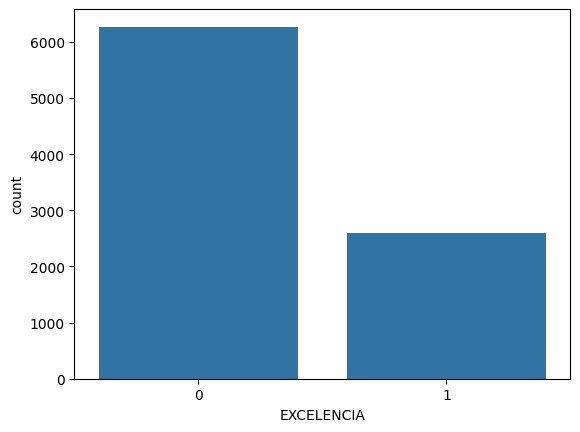

In [ ]:
import seaborn as sb
sb.countplot(x="EXCELENCIA", data=datos)

<Axes: xlabel='EXCELENCIA', ylabel='count'>

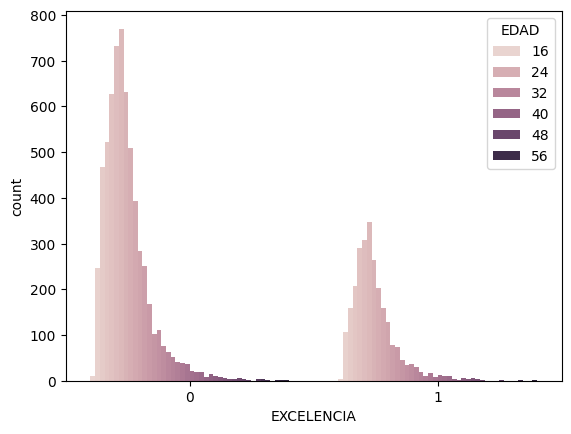

In [ ]:
sb.countplot(x="EXCELENCIA", data=datos, hue="EDAD")

In [ ]:
datos.isna().sum()

,0
ESCUELA,0
EDAD,0
PROMEDIO,0
EXCELENCIA,0
SEXO,0
HIJOS,0
TRABAJA_ESTUDIA,0
VIVE_SOLO,0
SEMESTRE,0
EST_CIVIL_1,0


In [ ]:
datoswoprom = datos.drop(["ESCUELA"], axis=1)

In [ ]:
print(datos.columns)

Index(['ESCUELA', 'EDAD', 'PROMEDIO', 'EXCELENCIA', 'SEXO', 'HIJOS',
       'TRABAJA_ESTUDIA', 'VIVE_SOLO', 'SEMESTRE', 'EST_CIVIL_1',
       'EST_CIVIL_2', 'NIVEL_SOCIO_ECON_1', 'NIVEL_SOCIO_ECON_2',
       'SEDE_PUERTO MALDONADO', 'SEDE_QUILLABAMBA', 'SEDE_SICUANI'],
      dtype='object')


<Axes: xlabel='EXCELENCIA', ylabel='count'>

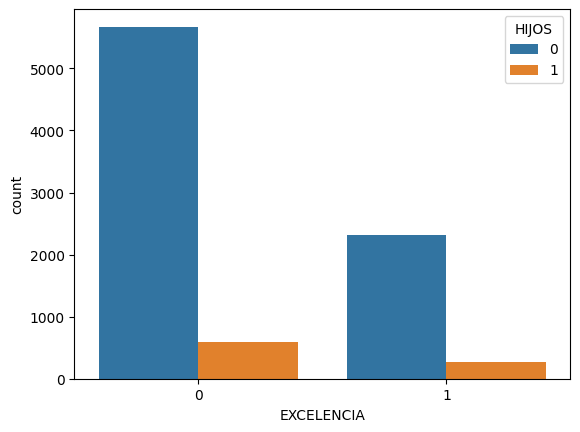

In [ ]:
sb.countplot(x="EXCELENCIA", data=datos, hue="HIJOS")

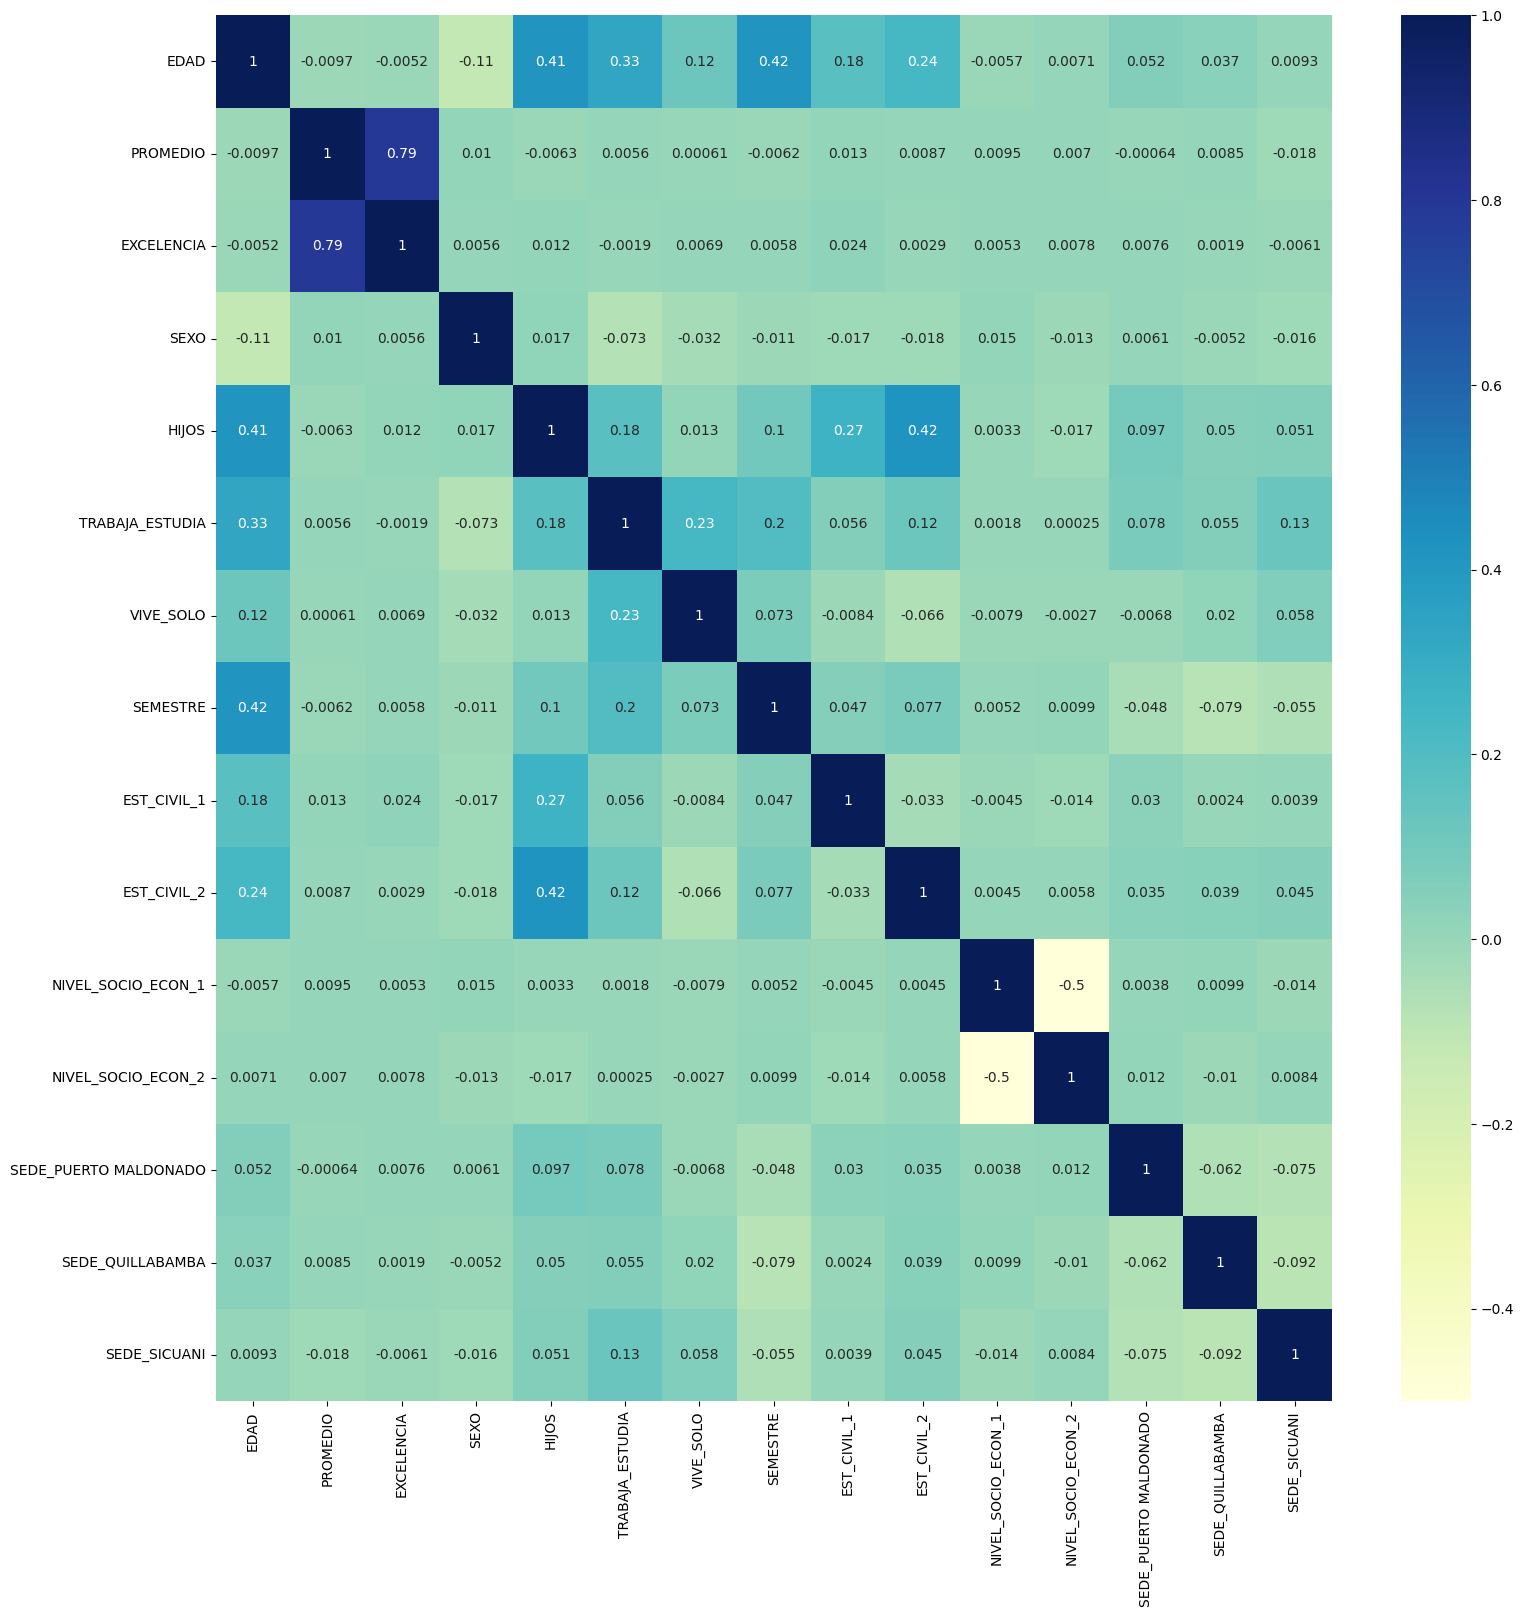

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Drop the 'ESCUELA' column from the DataFrame
datos = datos.drop(["ESCUELA"], axis=1)

plt.figure(figsize=(18, 18))  # Ajusta el tamaño según sea necesario
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
X = datos.drop(["EXCELENCIA"], axis=1)
y = datos["EXCELENCIA"]

In [ ]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_ent, y_ent)

LogisticRegression(max_iter=1000)

In [ ]:
predicciones = modelo.predict(X_pru)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.9994356659142212

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1286
           1       1.00      1.00      1.00       486

    accuracy                           1.00      1772
   macro avg       1.00      1.00      1.00      1772
weighted avg       1.00      1.00      1.00      1772



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[1285,    1],
       [   0,  486]])

In [ ]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,1285,1
Real: Si,0,486


In [ ]:
X.head()

,EDAD,PROMEDIO,SEXO,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,SEMESTRE,EST_CIVIL_1,EST_CIVIL_2,NIVEL_SOCIO_ECON_1,NIVEL_SOCIO_ECON_2,SEDE_PUERTO MALDONADO,SEDE_QUILLABAMBA,SEDE_SICUANI
0,20,16.466,1,0,0,0,4,False,False,False,True,False,False,False
1,27,19.103,0,0,1,0,5,False,False,False,True,False,True,False
2,22,14.318,0,0,1,1,10,False,False,True,False,False,False,False
3,27,14.088,1,1,1,1,7,False,True,False,True,False,True,False
4,31,15.463,0,0,1,1,10,False,False,False,True,False,True,False


In [ ]:
nueva_persona = [20 ,16.750, 1, 0, 0, 0, 4, True, False, True, False, False, False, False] # removed extra features
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Excelencia")
else:
  print("No Excelencia")

No Excelencia


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
